## Logistic Regression: Spam Filtering

In [1]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
import os
f = open(os.path.expanduser("~/Documents/spam.csv") )
message_data = pd.read_csv(f, delimiter=',',header=None, encoding='latin')
message_data.head()
# open and read the file

,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [3]:
message_data.groupby(0).describe()
# these are the more common messages, so we know what the majority of the spam looks like and what the 'not spam'
# looks like

1                                                                 \
     count unique                                                top freq   
0                                                                           
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   
v1       1      1                                                 v2    1   

         2                                                                 \
     count unique                                                top freq   
0                                                                           
ham     45     39   bt not his girlfrnd... G o o d n i g h t . . .@"    3   
spam     5      4                                        PO Box 5249    2   
v1       0      0                                                NaN  NaN   

         3                                        4                       
     count unique                    top freq count unique      top freq  
0                                                                         
ham     10      9                     GE    2     6      5  GNT:-)"    2  
spam     2      1   MK17 92H. 450Ppw 16"    2     0      0      NaN  NaN  
v1       0      0                    NaN  NaN     0      0      NaN  NaN

In [4]:
message_data_copy = message_data[1].copy()
# these are the messages

In [5]:
message_data_copy

0                                                      v2
1       Go until jurong point, crazy.. Available only ...
2                           Ok lar... Joking wif u oni...
3       Free entry in 2 a wkly comp to win FA Cup fina...
4       U dun say so early hor... U c already then say...
5       Nah I don't think he goes to usf, he lives aro...
6       FreeMsg Hey there darling it's been 3 week's n...
7       Even my brother is not like to speak with me. ...
8       As per your request 'Melle Melle (Oru Minnamin...
9       WINNER!! As a valued network customer you have...
10      Had your mobile 11 months or more? U R entitle...
11      I'm gonna be home soon and i don't want to tal...
12      SIX chances to win CASH! From 100 to 20,000 po...
13      URGENT! You have won a 1 week FREE membership ...
14      I've been searching for the right words to tha...
15                    I HAVE A DATE ON SUNDAY WITH WILL!!
16      XXXMobileMovieClub: To use your credit, click ...
17            

In [6]:
vectorizer = TfidfVectorizer("english")

In [7]:
message_mat = vectorizer.fit_transform(message_data_copy)
message_mat

<5573x8673 sparse matrix of type '<type 'numpy.float64'>'
	with 73917 stored elements in Compressed Sparse Row format>

In [8]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, message_data[0], test_size=0.3, random_state=20)


0.9575358851674641
[[1439    8]
 [  63  162]]


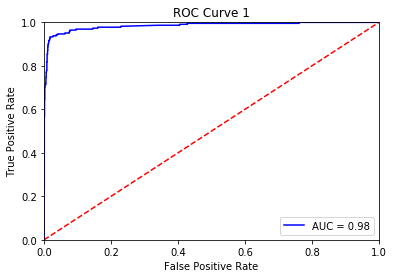

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Spam_model = LogisticRegression(solver='liblinear', penalty='l1') 
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
print accuracy_score(spam_nospam_test,pred)
conf_matrix2 = metrics.confusion_matrix(spam_nospam_test, pred)
print conf_matrix2

probs = Spam_model.predict_proba(message_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(spam_nospam_test, preds, pos_label='spam')
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROC Curve 1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[1439    8]
 [  63  162]]


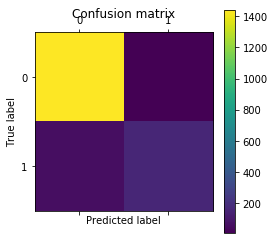

In [11]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
y_test = spam_nospam_test
y_pred = pred
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [13]:
message_data_copy = message_data_copy.apply(stemmer)
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(message_data_copy)

In [14]:
message_train, message_test, spam_nospam_train, spam_nospam_test2 = train_test_split(message_mat, message_data[0], test_size=0.3, random_state=20)

0.958732057416268
[[1442    5]
 [  64  161]]


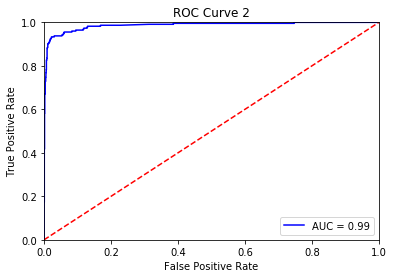

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred2 = Spam_model.predict(message_test)
print accuracy_score(spam_nospam_test2,pred2)
conf_matrix2 = metrics.confusion_matrix(spam_nospam_test2, pred2)
print conf_matrix2

probs2 = Spam_model.predict_proba(message_test)
preds2 = probs2[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(spam_nospam_test2, preds2, pos_label='spam')
roc_auc = metrics.auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('ROC Curve 2')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[1442    5]
 [  64  161]]


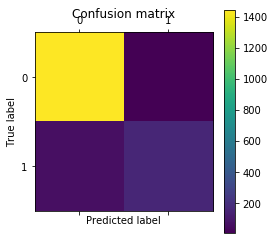

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
y_test = spam_nospam_test2
y_pred = pred2
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
message_data['length'] = message_data[1].apply(len)
message_data.head()

,0,1,2,3,4,length
0,v1,v2,NaN,NaN,NaN,2
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49


In [18]:
length = message_data['length'].values
new_mat = np.hstack((message_mat.todense(),length[:, None]))

In [19]:
message_train, message_test, spam_nospam_train, spam_nospam_test3 = train_test_split(new_mat, message_data[0], test_size=0.3, random_state=20)

0.9665071770334929
[[1439    8]
 [  48  177]]


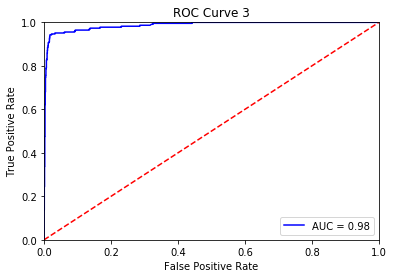

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred3 = Spam_model.predict(message_test)
print accuracy_score(spam_nospam_test3,pred3)
conf_matrix3 = metrics.confusion_matrix(spam_nospam_test3, pred3)
print conf_matrix3

probs3 = Spam_model.predict_proba(message_test)
preds3 = probs3[:,1]
fpr3, tpr3, threshold = metrics.roc_curve(spam_nospam_test3, preds3, pos_label='spam')
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROC Curve 3')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[1439    8]
 [  48  177]]


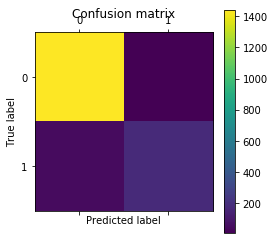

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
y_test = spam_nospam_test3
y_pred = pred3
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()